In [32]:
import sys
import seaborn as sns
from starmap.sequencing import *

In [35]:
base_path = './'

# Load reads information (read_file)
S = loadmat(os.path.join(base_path, 'goodPoints_max3d.mat'))
bases = [str(i[0][0]) for i in S["tile_goodReads"]]
temp = S["tile_goodSpots"][:, :2]
points = np.zeros(temp.shape)
points[:, 0] = np.round(temp[:, 1]-1)
points[:, 1] = np.round(temp[:, 0]-1)
print(f"Number of reads: {len(bases)}")

# Load dapi label
dapi = load_label_image('./', fname='dapi_max.tif')
dapi.shape

Number of reads: 77235


(7490, 7492)

In [36]:
# Load gene information (genes.csv)
genes2seqs, seqs2genes = load_genes(base_path)

genes = [seqs2genes[k] for k in bases]

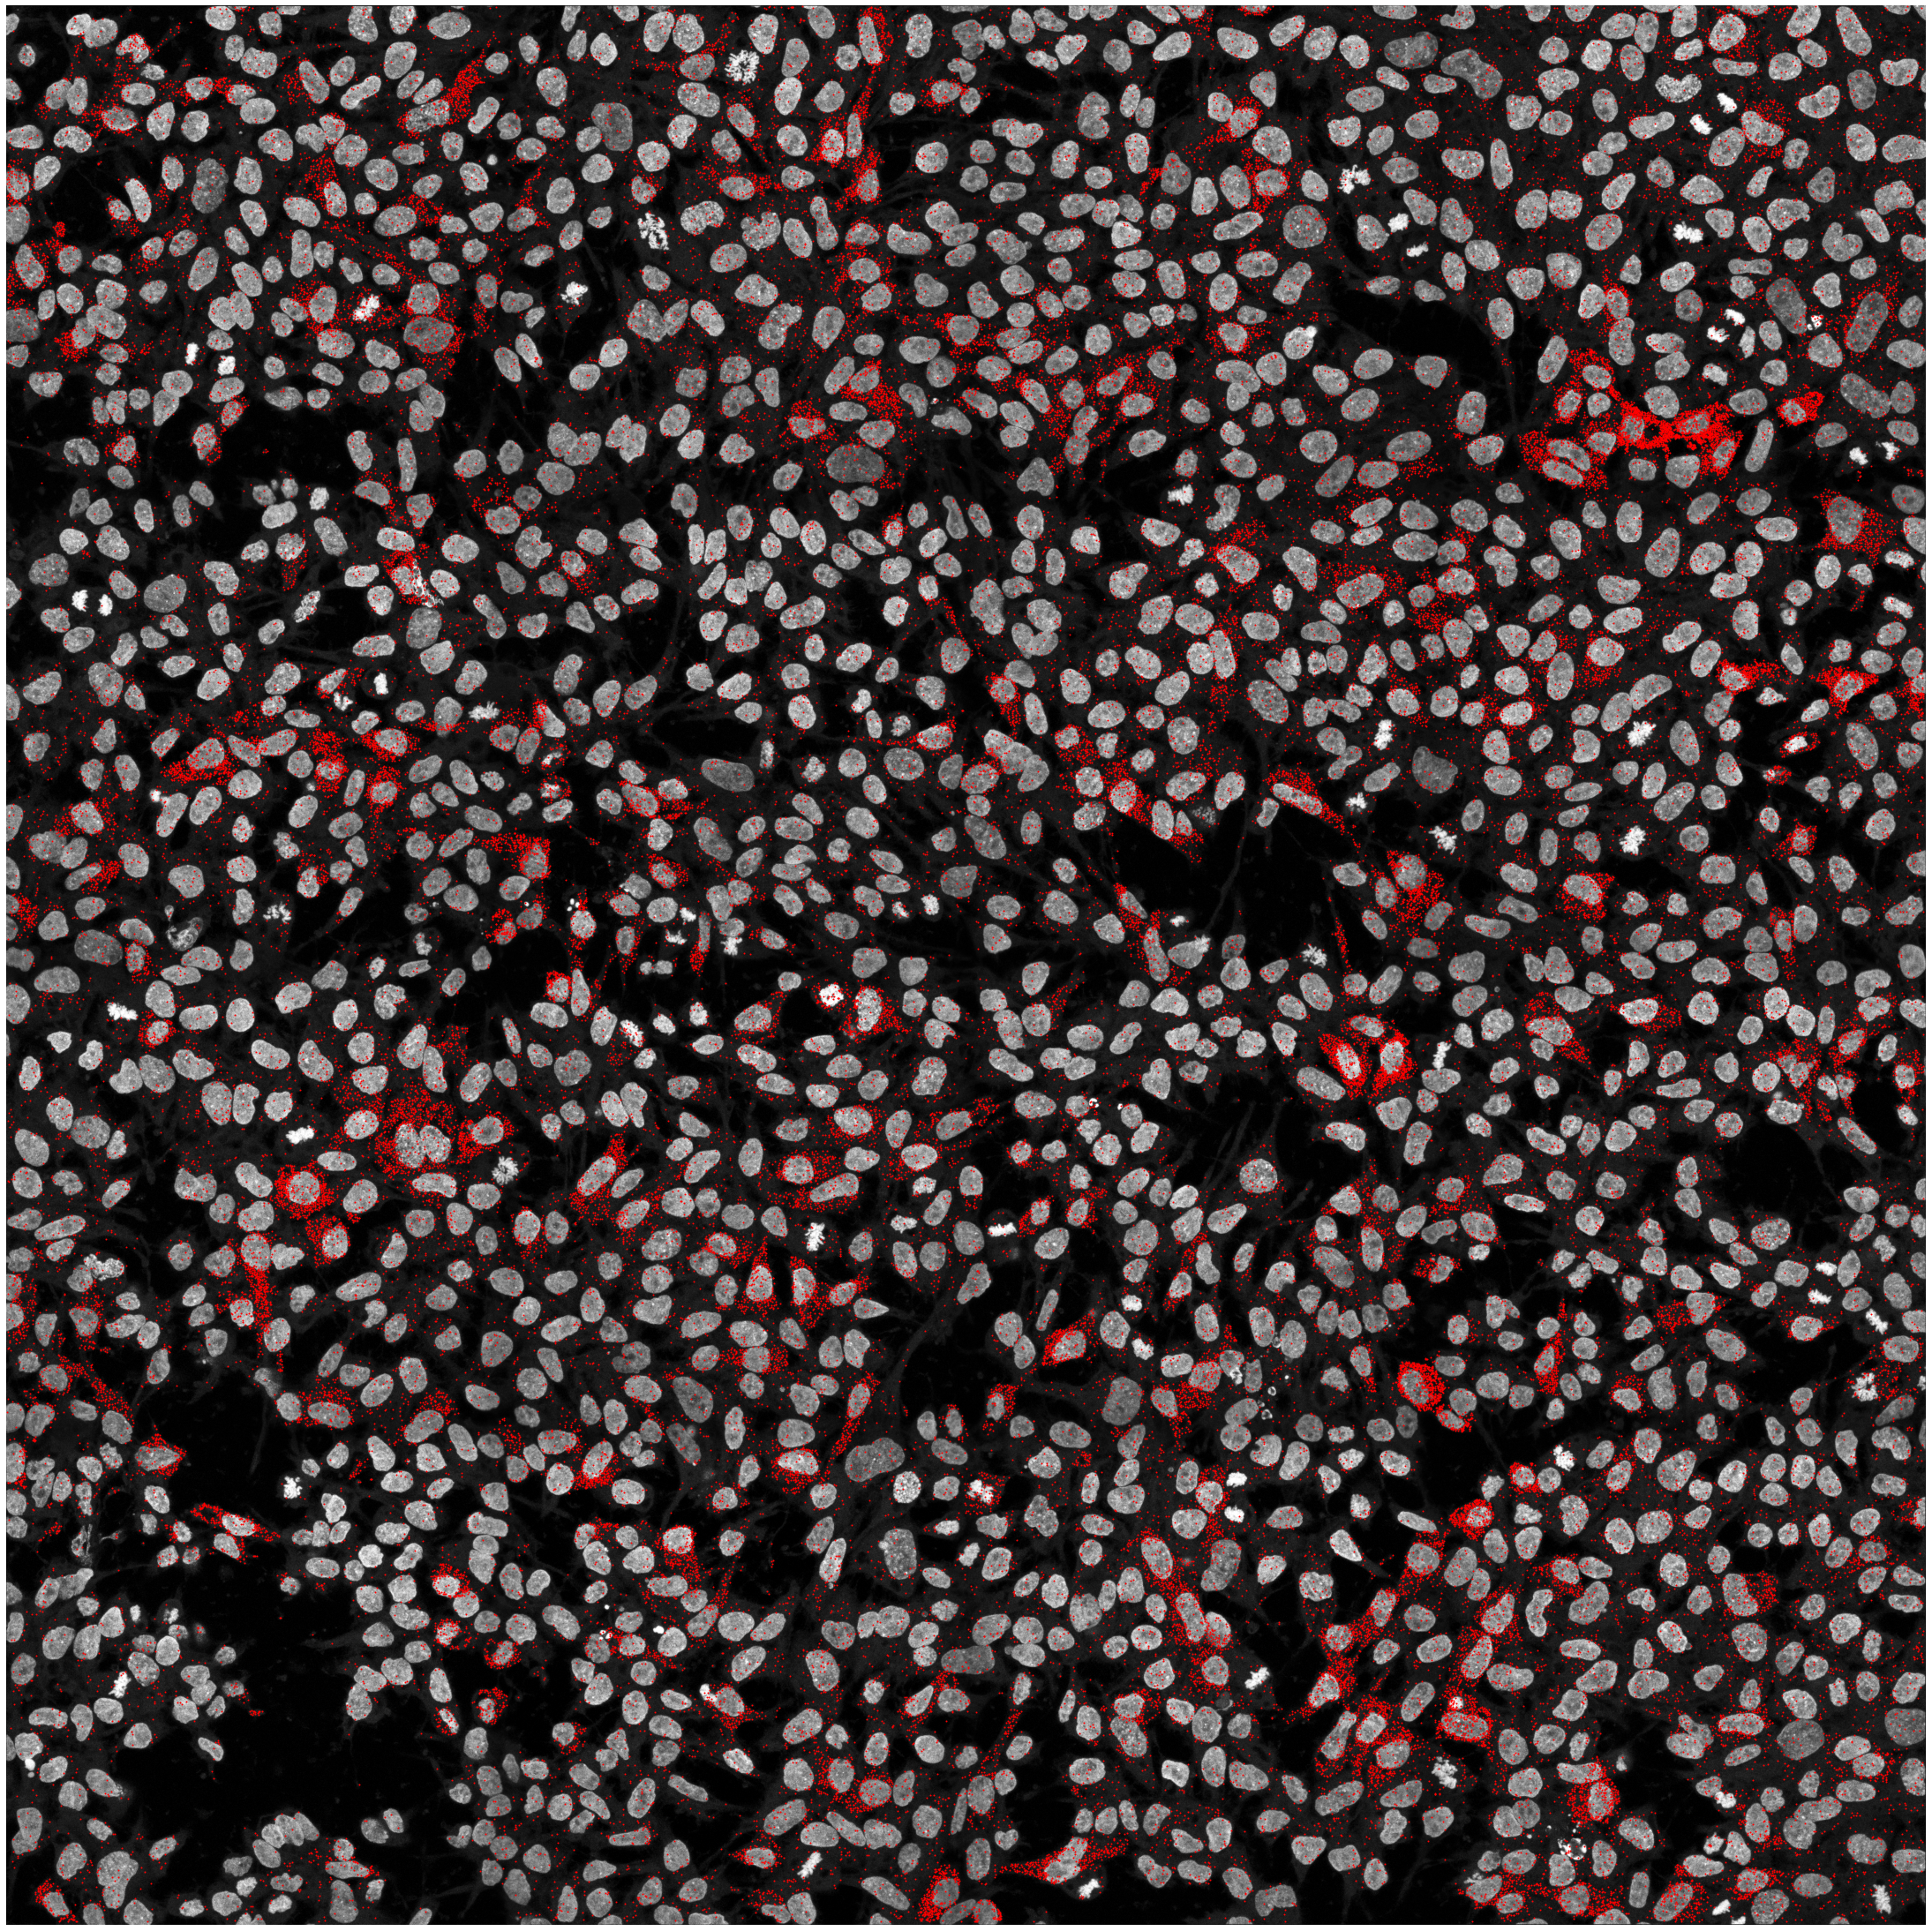

In [37]:
# Plot dots location on dapi
plt.figure(figsize=(80,40))
plt.imshow(dapi, cmap='gray')
plt.plot(points[:, 1], points[:, 0], '.', color='red', markersize=2)
plt.axis('off')
plt.savefig(os.path.join(out_path, "all_dots.png"))
plt.show()

In [5]:
import colorsys
from random import shuffle, uniform
from matplotlib.colors import ListedColormap

def intervals(parts, duration):
    part_duration = duration / parts
    return [(i * part_duration + (i + 1) * part_duration)/2 for i in range(parts)]

In [18]:
number_of_colors = 16

color_points = intervals(number_of_colors, 1)
shuffle(color_points)
cluster_color = []
for i in range(number_of_colors):
    cluster_color.append(colorsys.hsv_to_rgb(color_points[i], uniform(0.5, 1), 1))


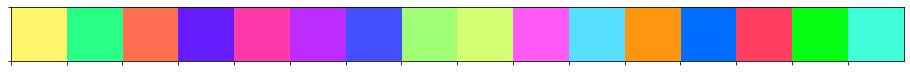

In [82]:
# set colormap
curr_pl = sns.color_palette(cluster_color)
sns.palplot(curr_pl)
curr_cmap = ListedColormap(cluster_color)

In [83]:
# set colormap
# curr_pl = sns.color_palette('rainbow', 16)
# sns.palplot(curr_pl)
# curr_cmap = ListedColormap(cluster_color)

In [84]:
unique_genes = np.unique(genes).tolist()
unique_genes

['BCL11B',
 'DLX1',
 'EOMES',
 'HOPX',
 'PTPRZ1',
 'SOX2',
 'gfp_ctrl',
 'mCherry',
 'sg_cdk5_1',
 'sg_cdk5_2',
 'sg_ctrl1',
 'sg_ctrl2',
 'sg_nkx21_2',
 'sg_nxk21_1',
 'sg_reln_1',
 'sg_reln_2']

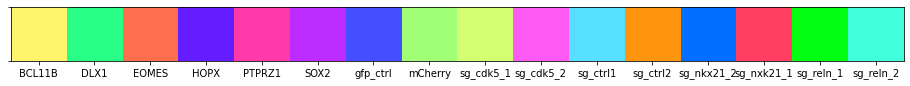

In [85]:
sns.palplot(curr_pl)
plt.xticks(range(16), unique_genes)
plt.savefig(os.path.join(out_path, "colors.png"))
plt.show()

In [23]:
out_path = os.path.join(base_path, 'output')
if not os.path.exists(out_path):
    os.mkdir(out_path)

In [38]:
np_genes = np.array(genes)

In [39]:
# Plot individual gene pattern on dapi
for i in range(len(unique_genes)):
    plt.figure(figsize=(80,40))
    plt.imshow(dapi, cmap='gray')
    curr_gene = unique_genes[i]
    curr_index = np.argwhere(np_genes == curr_gene)
    curr_points = np.squeeze(points[curr_index])
    print(curr_points.shape)
    plt.plot(curr_points[:, 1], curr_points[:, 0], '.', color=cluster_color[i], markersize=2)
    plt.title(curr_gene)
    plt.axis('off')
    plt.savefig(os.path.join(out_path, f"{curr_gene}_{curr_points.shape[0]}.png"))
    plt.clf()
    plt.close()

(1368, 2)
(2864, 2)
(219, 2)
(304, 2)
(16032, 2)
(11668, 2)
(4075, 2)
(16595, 2)
(5613, 2)
(3204, 2)
(1496, 2)
(124, 2)
(3600, 2)
(7571, 2)
(1286, 2)
(1216, 2)


In [26]:
# Plot individual gene pattern on dapi (first six)
plt.figure(figsize=(80,40))
plt.imshow(dapi, cmap='gray')

for i in range(6):
    # print(i)
    curr_gene = unique_genes[i]
    curr_index = np.argwhere(np_genes == curr_gene)
    curr_points = np.squeeze(points[curr_index])
    plt.plot(curr_points[:, 1], curr_points[:, 0], '.', color=cluster_color[i], markersize=2)
    
plt.axis('off')
plt.savefig(os.path.join(out_path, "Gene1-6.png"))
plt.clf()
plt.close()

In [27]:
# Plot individual gene pattern on dapi (first six)
plt.figure(figsize=(80,40))
plt.imshow(dapi, cmap='gray')

for i in range(6, 16):
    print(i)
    curr_gene = unique_genes[i]
    curr_index = np.argwhere(np_genes == curr_gene)
    curr_points = np.squeeze(points[curr_index])
    plt.plot(curr_points[:, 1], curr_points[:, 0], '.', color=cluster_color[i], markersize=2)
    
plt.axis('off')
plt.savefig(os.path.join(out_path, "Gene7-16.png"))
plt.clf()
plt.close()

6
7
8
9
10
11
12
13
14
15


In [86]:
# Plot individual gene pattern on dapi (all)
plt.figure(figsize=(80,40))
plt.imshow(dapi, cmap='gray')

for i in range(0, 16):
    print(i)
    curr_gene = unique_genes[i]
    curr_index = np.argwhere(np_genes == curr_gene)
    curr_points = np.squeeze(points[curr_index])
    plt.plot(curr_points[:, 1], curr_points[:, 0], '.', color=cluster_color[i], markersize=2, label=curr_gene)
    
plt.legend(loc='lower right')
plt.axis('off')
plt.savefig(os.path.join(out_path, "all_genes.png"))
plt.clf()
plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


## mCherry

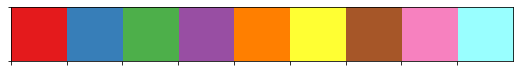

In [71]:
# set colormap
curr_pl = sns.color_palette('Set1', 9)
curr_pl.pop()
curr_pl.append((0.6, 1, 1))
sns.palplot(curr_pl)
curr_cmap = ListedColormap(cluster_color)

In [73]:
sg_genes = unique_genes[7:]
sg_genes

['mCherry',
 'sg_cdk5_1',
 'sg_cdk5_2',
 'sg_ctrl1',
 'sg_ctrl2',
 'sg_nkx21_2',
 'sg_nxk21_1',
 'sg_reln_1',
 'sg_reln_2']

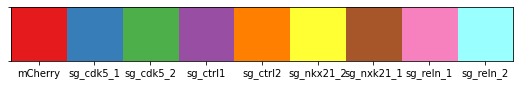

In [79]:
sns.palplot(curr_pl)
plt.xticks(range(9), sg_genes)
plt.savefig(os.path.join(out_path, "colors.png"))
plt.show()

In [78]:
# Plot individual gene pattern on dapi (mCherry + individual sg gene)
for i in range(1, len(sg_genes)):
    plt.figure(figsize=(80,40))
    plt.imshow(dapi, cmap='gray')

    # Plot sg_gene
    curr_gene = sg_genes[i]
    curr_index = np.argwhere(np_genes == curr_gene)
    curr_points = np.squeeze(points[curr_index])
    plt.plot(curr_points[:, 1], curr_points[:, 0], '.', color=curr_pl[i], markersize=2, label=curr_gene)
    
    # Plot mCherry
    m_index = np.argwhere(np_genes == 'mCherry')
    m_points = np.squeeze(points[m_index])
    plt.plot(m_points[:, 1], m_points[:, 0], '.', color=curr_pl[0], markersize=2, label='mCherry')
    
    plt.legend(loc='lower right')

    plt.axis('off')
    # plt.show()
    plt.savefig(os.path.join(out_path, f"mCherry_{curr_gene}.png"))
    plt.clf()
    plt.close()

In [81]:
# Plot individual gene pattern on dapi (mCherry + all sg genes)
plt.figure(figsize=(80,40))
plt.imshow(dapi, cmap='gray')

# Plot mCherry
m_index = np.argwhere(np_genes == 'mCherry')
m_points = np.squeeze(points[m_index])
plt.plot(m_points[:, 1], m_points[:, 0], '.', color=curr_pl[0], markersize=2, label='mCherry')

for i in range(1, len(sg_genes)):

    # Plot sg_gene
    curr_gene = sg_genes[i]
    curr_index = np.argwhere(np_genes == curr_gene)
    curr_points = np.squeeze(points[curr_index])
    plt.plot(curr_points[:, 1], curr_points[:, 0], '.', color=curr_pl[i], markersize=2, label=curr_gene)
    
plt.legend(loc='lower right')

plt.axis('off')
# plt.show()
plt.savefig(os.path.join(out_path, f"mCherry_all.png"))
plt.clf()
plt.close()